(-0.5, 639.5, 575.5, -0.5)

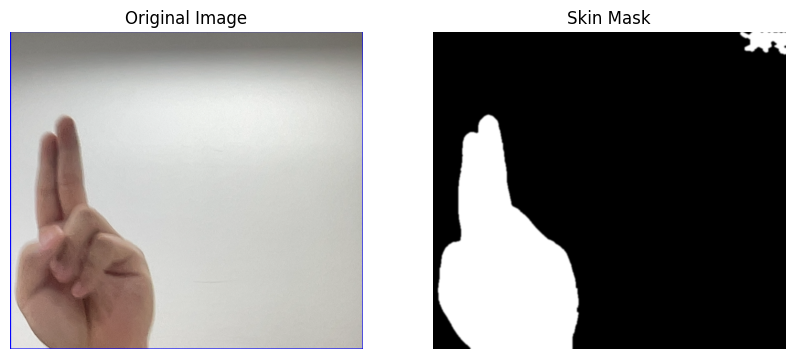

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "data/U/image_11.png"
image = cv2.imread(image_path)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower_skin, upper_skin)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) 
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

mask = cv2.GaussianBlur(mask, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.title("Skin Mask")
plt.axis("off")


In [3]:

def to_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    mask = cv2.inRange(hsv, lower_skin, upper_skin)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) 
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    mask = cv2.GaussianBlur(mask, (5, 5), 0)
    
    return mask

In [11]:
# import os
# import cv2

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#     return images

# images = load_images_from_folder("data/Y")
# # Ghi ảnh mask sang 1 folder khác
# for i, image in enumerate(images):
#     mask = to_mask(image)
#     cv2.imwrite(f"data_mask/Y_mask/image_{i}.png", mask)

In [2]:
import os
os.listdir("data_mask")

['U', 'I', 'A', 'F', 'O', 'C', 'B', 'K', 'L', 'Y']